# Connect to Database

In [62]:
# Import dependencies
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn

from config import login
# N.B. external config.py file should be formatted like:
# login = 'postgres:password' where password is set to whatever your database password is. Default username is 
# postgres, but change this if you use a different username.

In [2]:
# Connect to DB
db_url = 'postgresql://' + login + '@localhost:5432/commoditiexs_db'
engine = create_engine(db_url)
connection = engine.connect()

In [ ]:
crude_oil, natural_gas
crude_oil = pd.read_sql('Select * from crude_oil', cnx)

In [18]:
select_from_db = 'SELECT crude_oil.date, crude_oil.usd_per_barrel AS "Crude Oil USD per Barrel", natural_gas.usd_per_million_btu AS "Natural Gas USD per MM Btu"\
FROM crude_oil \
JOIN natural_gas \
ON crude_oil.date = natural_gas.date;'
crude_plus_gas = pd.read_sql(select_from_db, connection)


In [20]:
crude_plus_gas.head()

,date,Crude Oil USD per Barrel,Natural Gas USD per MM Btu
0,1990-06-19,15.55,1.622
1,1990-06-20,15.43,1.590
2,1990-07-02,16.94,1.630
3,1990-07-03,16.73,1.640
4,1990-07-05,16.50,1.640


In [24]:
crude_plus_gas["date"] = pd.to_datetime(crude_plus_gas["date"])

In [27]:
crude_plus_gas = crude_plus_gas.set_index("date")

In [11]:
crude_plus_gas = crude_plus_gas.set_index("date")
crude_plus_gas.head()

,Crude Oil USD per Barrel,Natural Gas USD per MM Btu
date,,
1990-06-19,15.55,1.622
1990-06-20,15.43,1.590
1990-07-02,16.94,1.630
1990-07-03,16.73,1.640
1990-07-05,16.50,1.640


In [17]:
crude_plus_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7461 entries, 1990-06-19 to 2020-11-03
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crude Oil USD per Barrel    7461 non-null   float64
 1   Natural Gas USD per MM Btu  7461 non-null   float64
dtypes: float64(2)
memory usage: 494.9+ KB


In [29]:
last_5_years_crude_plus_gas = crude_plus_gas['2015-01-01':]

In [30]:
last_5_years_crude_plus_gas

,Crude Oil USD per Barrel,Natural Gas USD per MM Btu
date,,
2015-01-02,52.72,3.558
2015-01-05,50.05,3.457
2015-01-06,47.98,3.463
2015-01-07,48.69,3.414
2015-01-08,48.80,3.457
...,...,...
2020-10-28,37.27,3.034
2020-10-29,35.94,3.087
2020-10-30,35.64,3.138


In [38]:
file = "5_years_CEO.csv"
stocks_df = pd.read_csv(file)

In [41]:
stocks_df.head()

,date,high,close,open,volume,low
0,2015-11-13,106.489998,105.370003,106.160004,323200,104.750000
1,2015-11-16,108.360001,108.150002,104.820000,339700,104.589996
2,2015-11-17,108.580002,107.010002,108.150002,201200,106.809998
3,2015-11-18,105.910004,105.690002,105.650002,286100,103.949997
4,2015-11-19,107.809998,107.160004,106.849998,164800,106.570000


In [42]:
stocks_df["date"] = pd.to_datetime(stocks_df["date"])

In [43]:
stocks_df = stocks_df.set_index("date")

In [46]:
del stocks_df["high"]
del stocks_df["open"]
del stocks_df["volume"]
del stocks_df["low"]

In [48]:
stocks_df = stocks_df.rename(columns={"close":"CEO Stock Close"})

In [49]:
stocks_df.head()

,CEO Stock Close
date,
2015-11-13,105.370003
2015-11-16,108.150002
2015-11-17,107.010002
2015-11-18,105.690002
2015-11-19,107.160004


In [50]:
merge_df = pd.merge(last_5_years_crude_plus_gas, stocks_df, on="date")

In [51]:
merge_df

,Crude Oil USD per Barrel,Natural Gas USD per MM Btu,CEO Stock Close
date,,,
2015-11-13,40.69,2.759,105.370003
2015-11-16,41.68,2.765,108.150002
2015-11-17,40.73,2.758,107.010002
2015-11-18,40.75,2.712,105.690002
2015-11-19,40.55,2.661,107.160004
...,...,...,...
2020-10-28,37.27,3.034,92.150002
2020-10-29,35.94,3.087,92.050003
2020-10-30,35.64,3.138,92.120003


In [ ]:
ax3.set_title(title,pad=20, fontdict={'fontsize':24})

Text(0.5, 1.0, 'Crude Oil Past 5 Years + CEO Stock')

<Figure size 432x288 with 0 Axes>

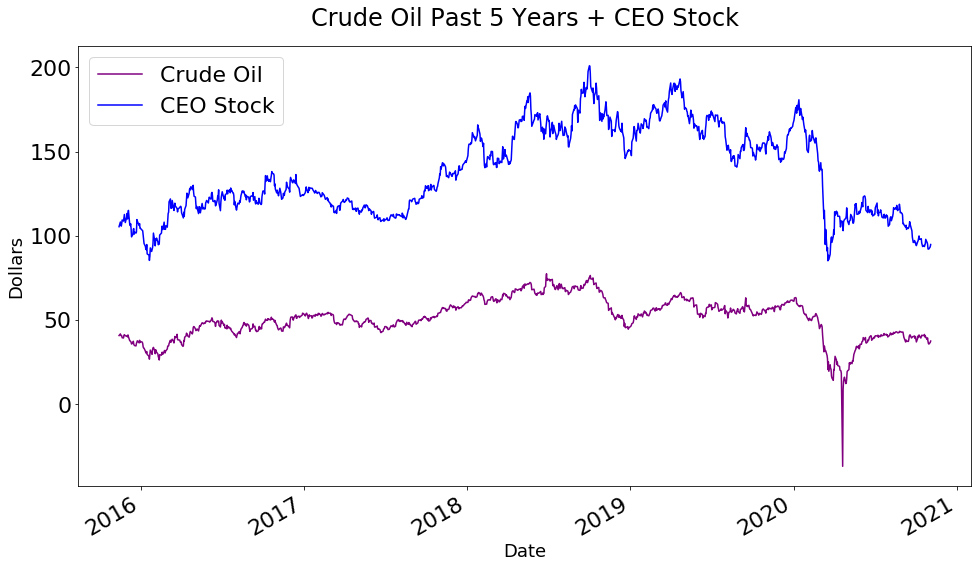

In [68]:
plt.figure()
plt.rcParams.update({'font.size': 22})
ax1 = merge_df.plot(y="Crude Oil USD per Barrel", kind="line", color="purple", label="Crude Oil", figsize=(16,9))
merge_df.plot(y="CEO Stock Close", kind="line", color="blue", label="CEO Stock", ax=ax1)
ax1.set_ylabel("Dollars",fontdict={'fontsize':18})
ax1.set_xlabel("Date",fontdict={'fontsize':18})
ax1.set_title("Crude Oil Past 5 Years + CEO Stock", pad=20, fontdict={'fontsize':24})


Text(0.5, 1.0, 'Natural Gas Past 5 Years')

<Figure size 432x288 with 0 Axes>

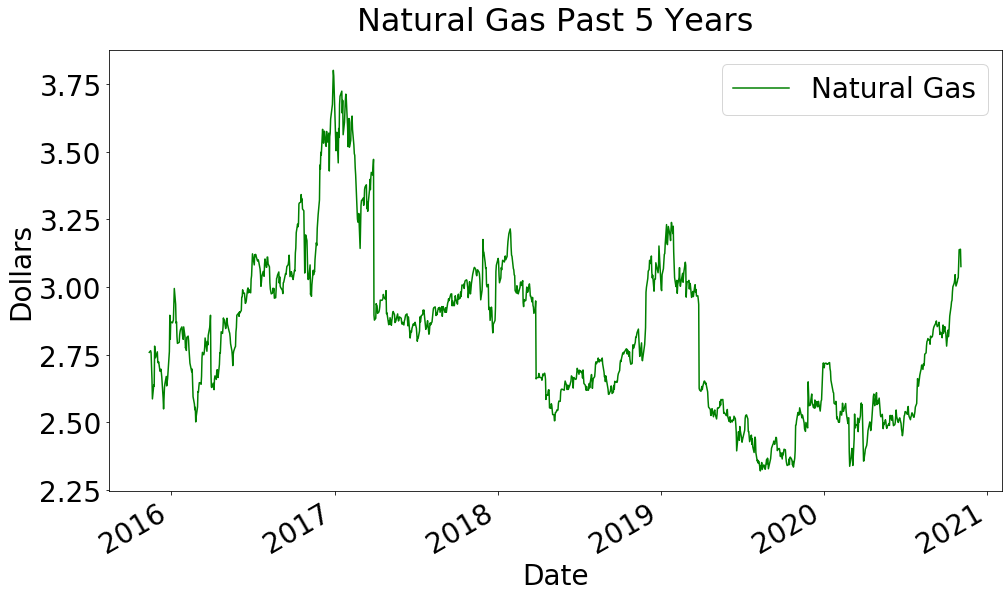

In [73]:
plt.figure()
plt.rcParams.update({'font.size': 28})
ax1 = merge_df.plot(y="Natural Gas USD per MM Btu", kind="line", color="green", label="Natural Gas", figsize=(16,9))
ax1.set_ylabel("Dollars",fontdict={'fontsize':28})
ax1.set_xlabel("Date",fontdict={'fontsize':28})
ax1.set_title("Natural Gas Past 5 Years", pad=20, fontdict={'fontsize':32})

In [74]:
fig = ax1.get_figure()
fig.savefig('natural_gas.png')